<a href="https://colab.research.google.com/github/Meghatomar182004/Spam-Email-Classification/blob/main/spamemail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 100.00%
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

The email is Spam.


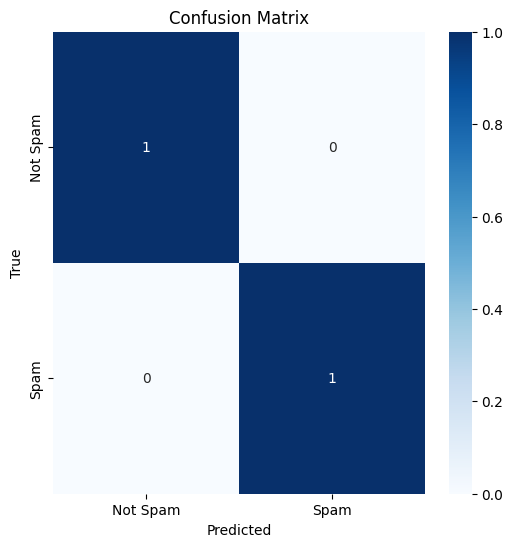

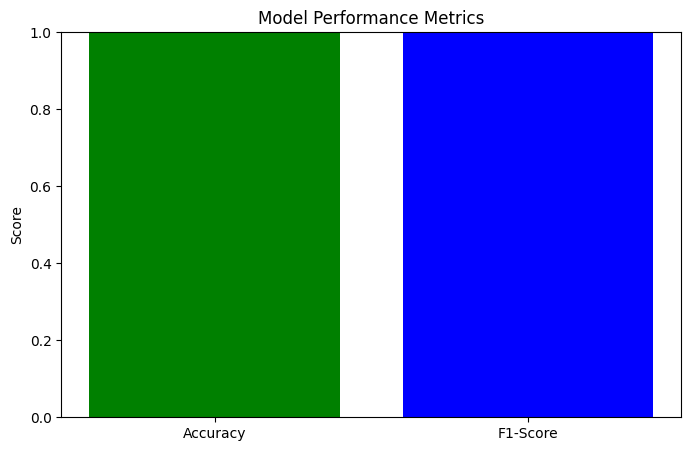

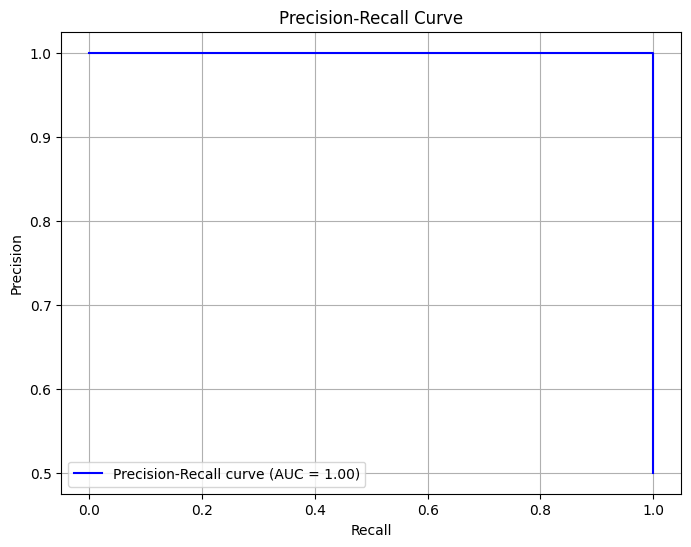

In [7]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

# Downloading NLTK resources
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('emails.csv')

# Preprocessing the email text
def preprocess_text(text):
    # Removing non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    # Tokenizing the text
    words = text.split()
    # Removing stop words and apply stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing on the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Splitting the data into training and testing sets
X = df['text']  # Features (email content)
y = df['label']  # Labels (spam or not spam)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting text data into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Training the model
model.fit(X_train_tfidf, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Example: Predict if a new email is spam or not
new_email = "Congratulations! You've won a free gift card, click here to claim your prize!"
new_email_processed = preprocess_text(new_email)
new_email_tfidf = vectorizer.transform([new_email_processed])
prediction = model.predict(new_email_tfidf)

if prediction == 1:
    print("The email is Spam.")
else:
    print("The email is Not Spam.")


# Ploting the confusion matrix
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Ploting Accuracy and F1-Score Comparison
accuracies = [accuracy]
f1_score = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']

# Ploting a simple bar chart comparing accuracy and F1 score
plt.figure(figsize=(8, 5))
plt.bar(['Accuracy', 'F1-Score'], [accuracies[0], f1_score], color=['green', 'blue'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Ploting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])

# Calculating AUC for the precision-recall curve
auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()
